In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT

Downloading...
From: https://drive.google.com/uc?id=15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT
To: /content/irish-lyrics-eof.txt
100% 69.0k/69.0k [00:00<00:00, 24.6MB/s]


In [3]:
tokenizer = Tokenizer()

data = open('./irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print("{} ......... {}".format(dict(list(tokenizer.word_index.items())[0: 10]), dict(list(tokenizer.word_index.items())[-10:])))
print(total_words)                  # Total number of unique words


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10} ......... {'roamin': 2680, 'swear': 2681, 'treat': 2682, 'sportin': 2683, 'hurley': 2684, 'bollin': 2685, 'maids': 2686, 'summertime': 2687, 'pluck': 2688, 'yon': 2689}
2690


In [4]:
input_sequences = []																# Input sequences for training data
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)						# n-gram sequences. Like, [4,22], [4,22,5], [4,22,5,87], etc.

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])							# length of the longest sentence
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]							# Everything except the last value is X and label is the last value of the padded sequence

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

#------------------------------------------------
# Example
#------------------------------------------------
# Sentence: [0 0 0 0 4 2 66 8 67 68 69 70]
# X: [0 0 0 0 4 2 66 8 67 68 69]
# Label: [70]
# Y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...... 1 0 0 0 0]
#------------------------------------------------
# Y is an one-hot encoded array where the length is the size of the corpus of words
# and the value is set to one (1) is the one at the index of the label which in this case is the 70th element.

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [7]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [9]:
print(xs)

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0   0  47]
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]]


In [10]:
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))                             # size of Y is the total number of words in the corpus. Here, it's 2690
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)

377/377 [==============================] - 25s 66ms/step - loss: 0.8529 - accuracy: 0.7747
Epoch 92/100
377/377 [==============================] - 24s 64ms/step - loss: 0.8064 - accuracy: 0.7873
Epoch 93/100
377/377 [==============================] - 24s 64ms/step - loss: 0.8060 - accuracy: 0.7858
Epoch 94/100
377/377 [==============================] - 24s 64ms/step - loss: 0.8472 - accuracy: 0.7816
Epoch 95/100
377/377 [==============================] - 24s 64ms/step - loss: 0.9113 - accuracy: 0.7648
Epoch 96/100
377/377 [==============================] - 24s 64ms/step - loss: 0.8755 - accuracy: 0.7692
Epoch 97/100
377/377 [==============================] - 24s 64ms/step - loss: 0.8721 - accuracy: 0.7726
Epoch 98/100
377/377 [==============================] - 24s 65ms/step - loss: 0.8705 - accuracy: 0.7737
Epoch 99/100
377/377 [==============================] - 24s 64ms/step - loss: 0.8384 - accuracy: 0.7809
Epoch 100/100
377/377 [==============================] - 24s 64ms/step - loss

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

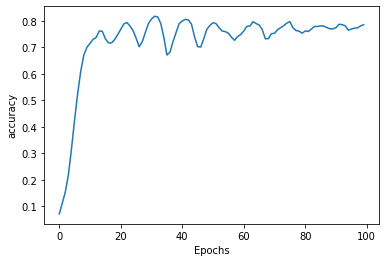

In [14]:
plot_graphs(history, 'accuracy')


In [19]:
seed_text = "Gautham went to Canada"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]											# Tokenize the seed_text using texts_to_sequences. Like, [15, 21, 9]. 
																																								# Here it will Ignore "Gautham" which isn't in the corpus.

	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')		# This will pad the sequence to match the trainng set.

	predict_x = model.predict(token_list, verbose=0)															# We will pass to model to get prediction back.
	predicted = np.argmax(predict_x, axis=1)																			# This will give token of the word most likely to be the next in the sequence.

	output_word = ""
	for word, index in tokenizer.word_index.items():															# We reverse lookup on the word index to turn the token back into word.
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word																								# We then add that to our seed text.
print(seed_text)

Gautham went to Canada the young and my love seen was rich but never nice on so we left me scarce at divinity many up from irish love and your way will find him i wonder clearly down of rocky road to dublin and love be seen place tears and i followed with napper
